# バックテスト検証ノート

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('/home/tsu-nera/repo/bakuchi/')
%cd '../'

/home/tsu-nera/repo/bakuchi


In [3]:
from src.utils.backtesting import Backtesting, run_backtesting

%reload_ext autoreload
%autoreload 2

File doesn't exist 


In [4]:
timestamp="2003142355"

In [5]:
bt = Backtesting(timestamp)

In [6]:
df_cc = bt.get_coincheck_df()
df_lq = bt.get_liquid_df()

In [7]:
len(df_cc), len(df_lq)

(23266, 23266)

## テスト実行

In [8]:
bt.run()

##  取引履歴

In [9]:
# comming soon...

## 結果まとめ

In [13]:
bt.display() 

バックテスト情報
--------  -------------------
開始日時  2020-03-14 23:55:18
終了日時  2020-03-15 06:56:23
--------  -------------------
利確しきい値 3000(JPY)
取引単位 0.009(BTC)
--------

バックテスト結果
---------  ------
利益(BTC)  -0
元金(BTC)   0.022
資産(BTC)   0.022
---------  ------
---------  -----
取引回数       1
利益(JPY)     34
元金(JPY)  12000
資産(JPY)  12034
---------  -----


## グラフ出力

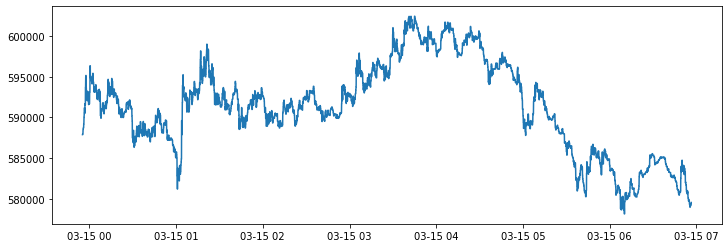

In [11]:
plt.figure(figsize=(12,4))
plt.plot(df_cc.index, df_cc['bid'])

In [12]:
##